# Дипломная работа


## Дипломная работа по курсу «Python для анализа данных»

1. Загрузить файл hr.csv (можно найти во сложении к заданию)

In [1]:
import pandas as pd

In [2]:
hr = pd.read_csv(r'C:\Users\RyzhikAV\PYDA-7\FinalWork\HR.csv')

In [91]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [8]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

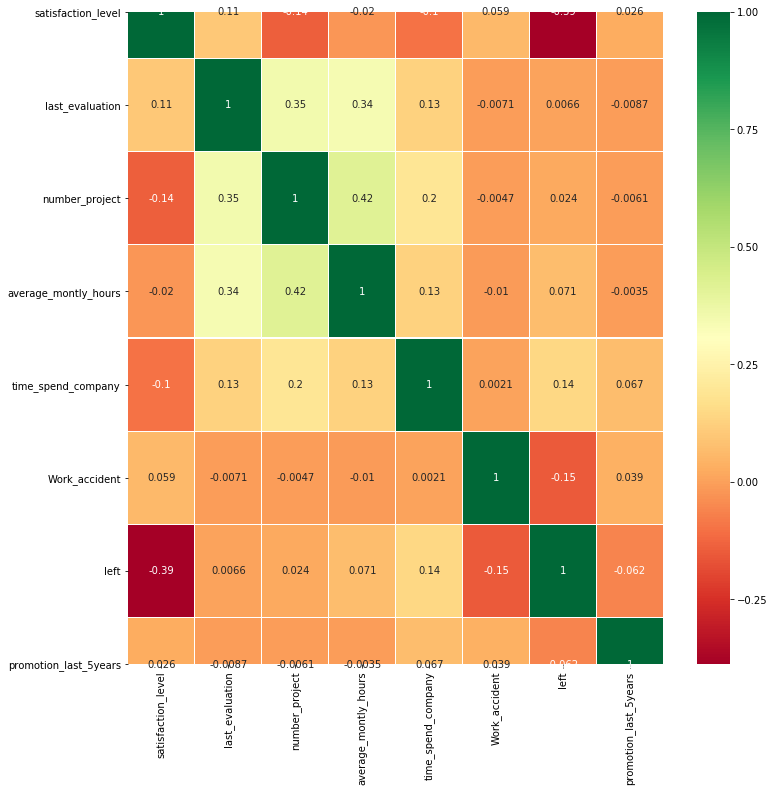

In [11]:
sns.heatmap(hr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

4. Визуализировать несколько взаимосвязей между переменными

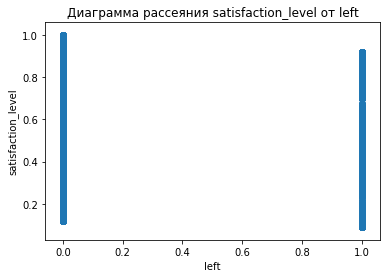

In [27]:
plt.xlabel('left')
plt.ylabel('satisfaction_level')
plt.title('Диаграмма рассеяния satisfaction_level от left')
plt.scatter(hr.left,hr.satisfaction_level)

plt.show()

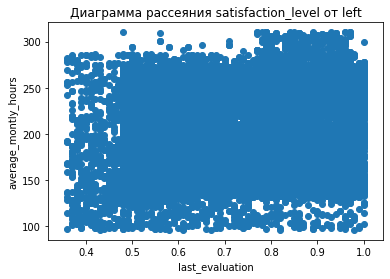

In [28]:
plt.xlabel('last_evaluation')
plt.ylabel('average_montly_hours')
plt.title('Диаграмма рассеяния satisfaction_level от left')
plt.scatter(hr.last_evaluation,hr.average_montly_hours)

plt.show()

5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [41]:
from scipy import stats

In [38]:
medium_satisfaction = hr[hr['salary'] == 'medium']['satisfaction_level']

In [39]:
high_satisfaction = hr[hr['salary'] == 'high']['satisfaction_level']

In [42]:
print(stats.ttest_ind(medium_satisfaction, high_satisfaction))

Ttest_indResult(statistic=-2.081861364315287, pvalue=0.03738816176204982)


In [43]:
low_satisfaction = hr[hr['salary'] == 'low']['satisfaction_level']
print(stats.ttest_ind(medium_satisfaction, low_satisfaction))

Ttest_indResult(statistic=4.928592335569859, pvalue=8.378854439781171e-07)


In [44]:
print('Уровень удовлетворенности значимо отличается в зависимости от уровня заработной платы')

Уровень удовлетворенности значимо отличается в зависимости от уровня заработной платы


6. Рассчитать сколько работников работает в каждом департаменте

In [80]:
hr[['sales', 'salary']].groupby('sales').count().sort_values(by='salary', ascending=False).reset_index().rename(
    columns = {'salary' : 'count employees', 'sales' : 'departure'})

,departure,count employees
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


7. Показать распределение сотрудников по зарплатам

In [81]:
hr[['salary', 'sales']].groupby('salary').count().sort_values(by='sales', ascending=False).reset_index().rename(
    columns = {'sales' : 'count employees'})

,salary,count employees
0,low,7316
1,medium,6446
2,high,1237


8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [87]:
hr[['salary', 'sales', 'left']].groupby(['salary', 'sales']).count().reset_index().rename(
    columns = {'left' : 'count employees', 'sales' : 'departure'})

,salary,departure,count employees
0,high,IT,83
1,high,RandD,51
2,high,accounting,74
3,high,hr,45
4,high,management,225
5,high,marketing,80
6,high,product_mng,68
7,high,sales,269
8,high,support,141
9,high,technical,201


9. Сколько сотрудников покинули компанию

In [89]:
sum(hr['left'])

3571

10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [99]:
left_promo_yes = hr[hr.promotion_last_5years == 1]['left']
left_promo_no = hr[hr.promotion_last_5years == 0]['left']

In [100]:
print(stats.ttest_ind(left_promo_yes, left_promo_no))

Ttest_indResult(statistic=-7.581195349367636, pvalue=3.6240472241469694e-14)


In [103]:
print ('Сотрудники, у которых не было продвижения по службе в течение последних 5 лет, увольняются значительно чаще')

Сотрудники, у которых не было продвижения по службе в течение последних 5 лет, увольняются значительно чаще


In [111]:
time_spend_more_4years = hr[hr.time_spend_company > 4]['left']
time_spend_less_4years = hr[hr.time_spend_company <= 4]['left']

In [112]:
print(stats.ttest_ind(time_spend_more_4years, time_spend_less_4years))

Ttest_indResult(statistic=19.350735172803166, pvalue=2.0275102553909982e-82)


In [115]:
print('Сотрудники со стажем более 4 лет увольняются значительно реже')

Сотрудники со стажем более 4 лет увольняются значительно реже
